##  Plotting


In [32]:
import numpy as np

def logistic(z: np.ndarray, a: float, b: float) -> np.ndarray:
    """ Compute logistic function
      Inputs:
         a: exponential parameter
         b: exponential prefactor
         z: numpy array; domain
      Outputs:
         f: numpy array of floats, logistic function
    """
    
    den = 1.0 + b * np.exp(-a * z)
    return 1.0 / den

def stretch_tanh(z: np.ndarray, a: float, b: float, c: float) -> np.ndarray:
    """ Compute stretched hyperbolic tangent
      Inputs:
         a: horizontal stretch parameter (a>1 implies a horizontal squish)
         b: vertical stretch parameter
         c: vertical shift parameter
         z: numpy array; domain
      Outputs:
         g: numpy array of floats, stretched tanh
    """
    return b * np.tanh(a * z) + c

In [34]:
x = np.linspace(-5.0, 5.0, 100) # Equally spaced grid of 100 pts between -5 and 5

f = logistic(x, 1.0, 1.0) # Generate data

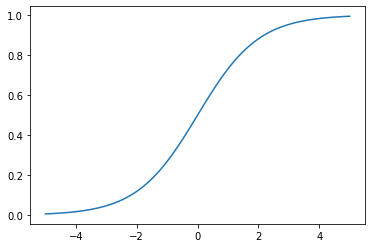

In [35]:
import matplotlib.pyplot as plt

# This is only needed in Jupyter notebooks!  Displays the plots for us.
%matplotlib inline 

plt.plot(x, f); # Use the semicolon to suppress some iPython output (not needed in real Python scripts)

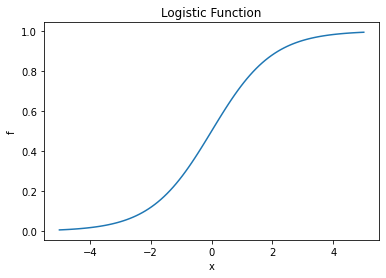

In [36]:
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f')
plt.title('Logistic Function');

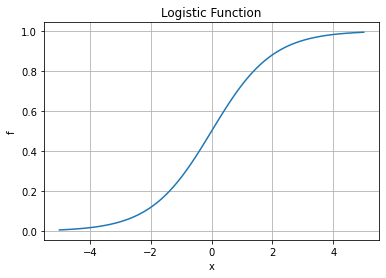

In [37]:
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f')
plt.title('Logistic Function')
plt.grid(True)

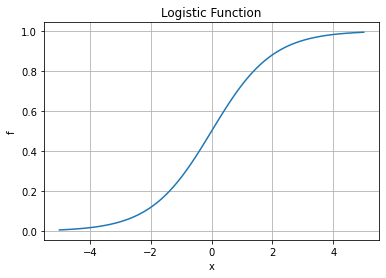

In [38]:
fig, ax = plt.subplots(1,1) # Get figure and axes objects

ax.plot(x, f) # Make a plot

# Create some labels
ax.set_xlabel('x')
ax.set_ylabel('f')
ax.set_title('Logistic Function')

# Grid
ax.grid(True)

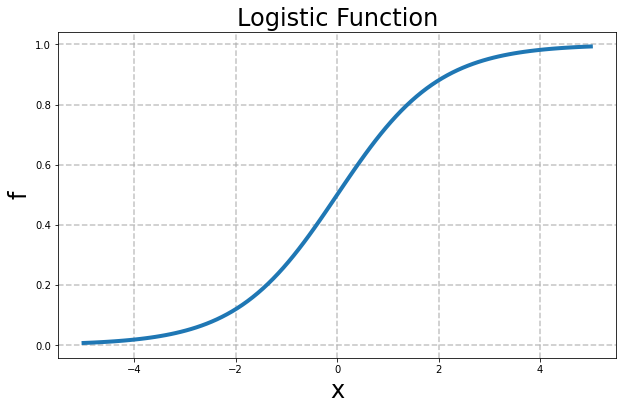

In [39]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) # Make figure bigger

ax.plot(x, f, lw=4) # Linewidth bigger
ax.set_xlabel('x', fontsize=24) # Fontsize bigger
ax.set_ylabel('f', fontsize=24) # Fontsize bigger
ax.set_title('Logistic Function', fontsize=24) # Fontsize bigger
ax.grid(True, lw=1.5, ls='--', alpha=0.75) # Update grid

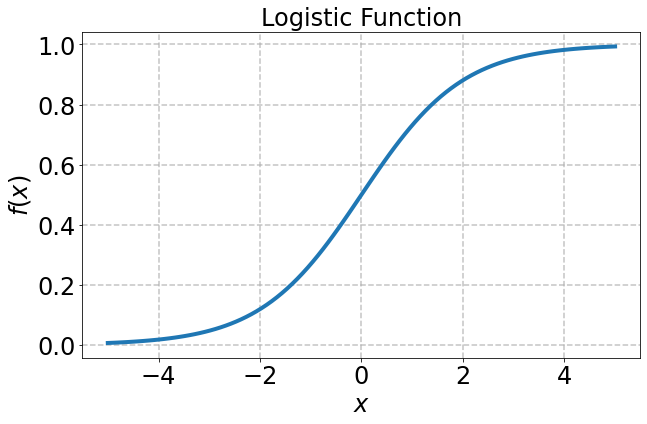

In [40]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) # Make figure bigger

# Make line plot
ax.plot(x, f, lw=4)

# Update ticklabel size
ax.tick_params(labelsize=24)

# Make labels
ax.set_xlabel(r'$x$', fontsize=24) # Use TeX for mathematical rendering
ax.set_ylabel(r'$f(x)$', fontsize=24) # Use TeX for mathematical rendering
ax.set_title('Logistic Function', fontsize=24)

ax.grid(True, lw=1.5, ls='--', alpha=0.75)

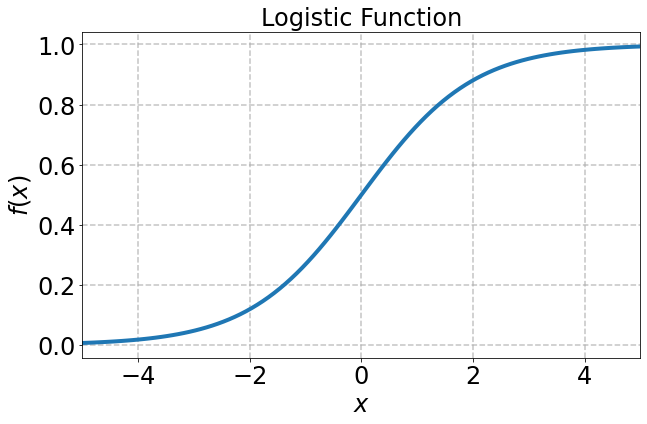

In [41]:
fig, ax = plt.subplots(1,1, figsize=(10,6)) # Make figure bigger

# Make line plot
ax.plot(x, f, lw=4)

# Set axes limits
ax.set_xlim(x.min(), x.max())

# Update ticklabel size
ax.tick_params(labelsize=24)

# Make labels
ax.set_xlabel(r'$x$', fontsize=24) # Use TeX for mathematical rendering
ax.set_ylabel(r'$f(x)$', fontsize=24) # Use TeX for mathematical rendering
ax.set_title('Logistic Function', fontsize=24)

ax.grid(True, lw=1.5, ls='--', alpha=0.75)

In [42]:
fig.savefig('logistic.png')

In [43]:
# your code here

In [44]:
import config # User-defined config file
plt.rcParams.update(config.pars) # Update rcParams to make nice plots

# First get the data
f1 = logistic(x, 1.0, 1.0)
f2 = logistic(x, 2.0, 1.0)
f3 = logistic(x, 3.0, 1.0)

fig, ax = plt.subplots(1,1, figsize=(10,6)) # Create figure object

# Make actual plots
# (Notice the label argument!)
ax.plot(x, f1, ls='-', label=r'$L(x;-1)$')
ax.plot(x, f2, ls='--', label=r'$L(x;-2)$')
ax.plot(x, f3, ls='-.', label=r'$L(x;-3)$')

# Set axes limits to make the scale nice
ax.set_xlim(x.min(), x.max())
ax.set_ylim(h.min(), 1.1)

# Make readable labels
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$h(x)$')
ax.set_title('Logistic Functions')

# Set up grid
ax.grid(True, lw=1.75, ls='--', alpha=0.75)

# Put legend on figure
ax.legend(loc='best')

ModuleNotFoundError: No module named 'config'

## Simple Linear Regression


In [ ]:
x_data = [1,2,3]
y_data = [2,2,4]
plt.scatter(x_data,y_data);

In [ ]:
# observed predictors
x_train = np.array([1, 2, 3])
y_train = np.array([2, 2, 4])

# check dimensions 
print(x_train.shape,y_train.shape)

In [ ]:
# Reshape to be a proper 2D array
x_train = x_train.reshape(x_train.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)

print(x_train.shape)

In [ ]:
# first, compute means
y_bar = np.mean(y_train)
x_bar = np.mean(x_train)

# build the two terms
numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
denominator = np.sum((x_train - x_bar)**2)

print(numerator.shape, denominator.shape) #check shapes

In [ ]:
#slope beta1
beta_1 = numerator/denominator

#intercept beta0
beta_0 = y_bar - beta_1*x_bar

print("The best-fit line is {0:8.6f} + {1:8.6f} * x".format(beta_0, beta_1))

In [ ]:
# Your code here

In [ ]:
x_train = np.array([1 ,2, 3])
y_train = np.array([2, 2, 4])

betas = simple_linear_regression_fit(x_train, y_train)

beta_0 = betas[0]
beta_1 = betas[1]

print("The best-fit line is {0:8.6f} + {1:8.6f} * x".format(beta_0, beta_1))

In [ ]:
# Your code here

The values of `beta0` and `beta1` seem roughly reasonable.  They capture the positive correlation.  The line does appear to be trying to get as close as possible to all the points.

### `statsmodels` and `sklearn`



In [ ]:
import statsmodels.api as sm

In [ ]:
# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train)

# this is the same matrix as in our scratch problem!
print(X)

# build the OLS model (ordinary least squares) from the training data
toyregr_sm = sm.OLS(y_train, X)

# do the fit and save regression info (parameters, etc) in results_sm
results_sm = toyregr_sm.fit()

# pull the beta parameters out from results_sm
beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print("The regression coefficients from the statsmodels package are: beta_0 = {0:8.6f} and beta_1 = {1:8.6f}".format(beta0_sm, beta1_sm))
# print("(beta0, beta1) = (%f, %f)" %(beta0_sm, beta1_sm))

In [ ]:
from sklearn import linear_model

In [ ]:
# build the least squares model
toyregr_skl = linear_model.LinearRegression()

# save regression info (parameters, etc) in results_skl
results_skl = toyregr_skl.fit(x_train, y_train)

# pull the beta parameters out from results_skl
beta0_skl = toyregr_skl.intercept_
beta1_skl = toyregr_skl.coef_[0]

print("The regression coefficients from the sklearn package are: beta_0 = {0:8.6f} and beta_1 = {1:8.6f}".format(beta0_skl, beta1_skl))

### `scikit-learn`


In [ ]:
import pandas as pd

#load mtcars
dfcars = pd.read_csv("data/mtcars.csv")
dfcars = dfcars.rename(columns={"Unnamed: 0":"car name"})
dfcars.head()

In [ ]:
# split into training set and testing set
from sklearn.model_selection import train_test_split

#set random_state to get the same split every time
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

In [ ]:
# testing set is around 20% of the total data; training set is around 80%
print("Shape of full dataset is: {0}".format(dfcars.shape))
print("Shape of training dataset is: {0}".format(traindf.shape))
print("Shape of test dataset is: {0}".format(testdf.shape))

In [ ]:
# Extract the response variable that we're interested in
y_train = traindf.mpg

In [ ]:
np.shape(y_train)

In [ ]:
y_train.shape

In [ ]:
y_train_reshape = y_train.values.reshape(y_train.shape[0], 1)

In [ ]:
y_train_reshape.shape

In [ ]:
y_train_reshape = traindf[['mpg']]

In [ ]:
y_train_reshape.shape

In [ ]:
y_train_reshape = y_train.values.reshape(-1,1)
y_train_reshape.shape

### Simple linear regression with automobile data


##  $k$-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors=5)

In [ ]:
knnreg.fit(X_train, y_train)
r2 = knnreg.score(X_test, y_test)
r2

In [ ]:
regdict = {}
# Do a bunch of KNN regressions
for k in [1, 2, 4, 6, 8, 10, 15]:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train, y_train)
    regdict[k] = knnreg # Store the regressors in a dictionary

In [ ]:
# Now let's plot it all
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(dfcars.wt, dfcars.mpg, 'o', label="data")

xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)
for k in [1, 2, 6, 10, 15]:
    predictions = regdict[k].predict(xgrid.reshape(100,1))
    if k in [1, 6, 15]:
        ax.plot(xgrid, predictions, label="{}-NN".format(k))

ax.legend();

In [ ]:
ks = range(1, 15) # Grid of k's
scores_train = [] # R2 scores
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k) # Create KNN model
    knnreg.fit(X_train, y_train) # Fit the model to training data
    score_train = knnreg.score(X_train, y_train) # Calculate R^2 score
    scores_train.append(score_train)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_train,'o-')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')